In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

In [41]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [42]:
df = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq="MS"
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [43]:
df["LogPassengers"]=np.log(df["Passengers"])

In [44]:
Ntest = 12
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [45]:
train_idx=df.index <=train.index[-1]
test_idx=df.index >train.index[-1]

In [46]:
model=pm.auto_arima(train["Passengers"],
                                            trace=True,
                                            suppress_warnings=True,
                                            seasonal=True,
                                            m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.32 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.12 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=907.046, Time=0.89 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.09 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.17 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.05 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.13 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(4,0,1)(0,1,0)[12] intercept   : AIC=909.320, Time=0.23 sec
 ARIMA(3,0,0)(0,1,0)[12]             : AIC=911.907, Time=0.05 sec

Best model:  ARIMA(3,0,0)(0,1,0)[12] intercept
Total fit time: 4.940 seconds


In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sun, 24 Oct 2021   AIC                            905.686
Time:                                    20:48:00   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

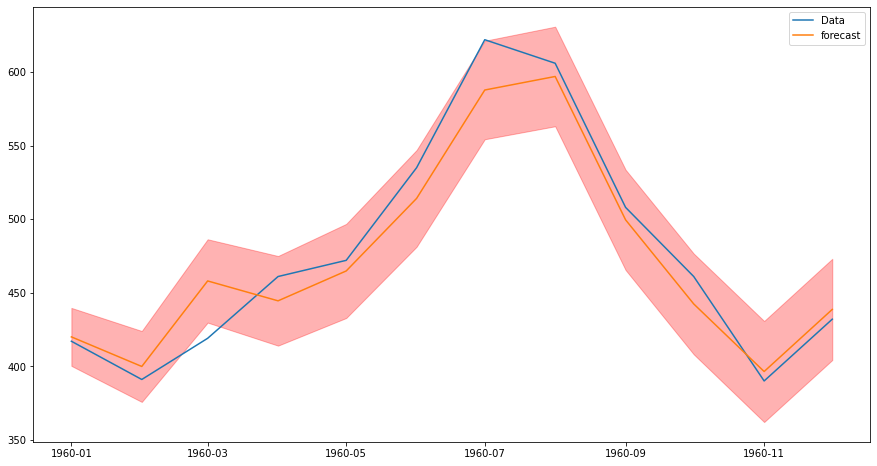

In [49]:
fig, ax= plt.subplots(figsize=(15,8))
ax.plot(test.index,test["Passengers"],label='Data')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],color='red',alpha=0.3)
ax.legend()

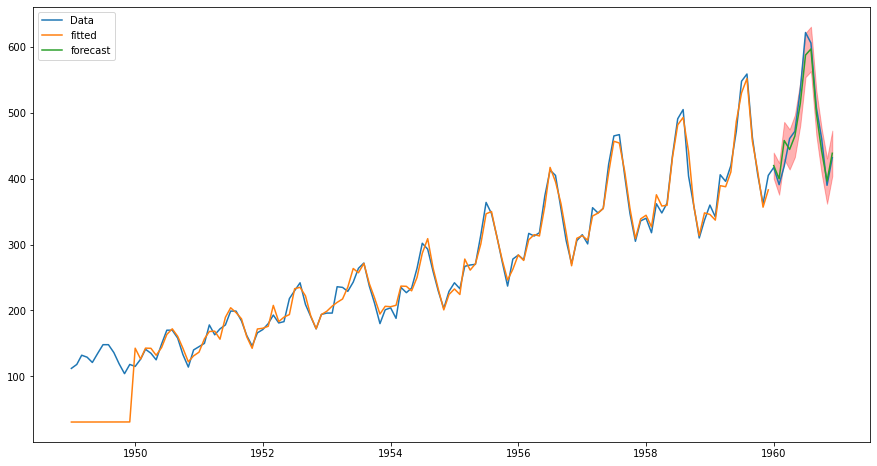

In [50]:
train_pred=model.predict_in_sample(start=0, end=-1)
fig,ax= plt.subplots(figsize=(15,8))
ax.plot(df.index,df["Passengers"],label='Data')
ax.plot(train.index,train_pred,label="fitted")
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],color='red',alpha=0.3)
ax.legend()

In [51]:
logmodel=pm.auto_arima(train["LogPassengers"],
                    trace=True,
                    suppress_warnings=True,
                    seasonal=True,
                    m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-438.252, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.026, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.328, Time=0.58 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.28 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=0.94 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.709, Time=0.58 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.571, Time=0.45 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.13 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-443.100, Time=0.59 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.426, Time=1.18 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sun, 24 Oct 2021   AIC                            905.686
Time:                                    20:48:19   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

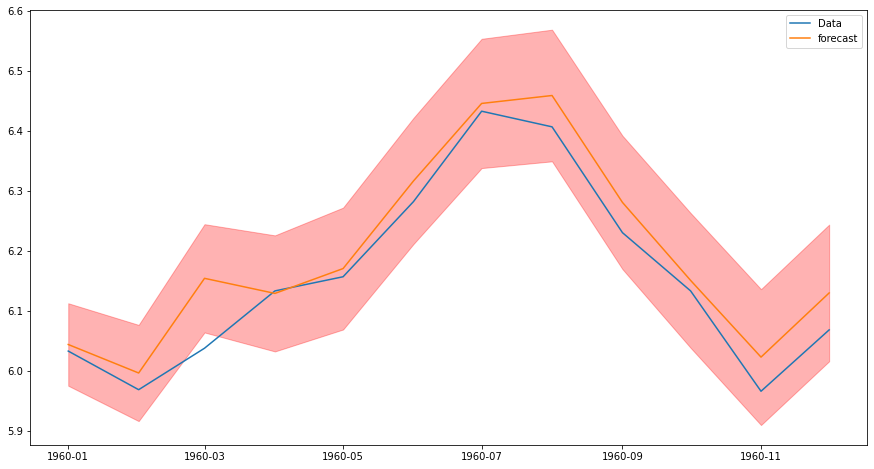

In [53]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax= plt.subplots(figsize=(15,8))
ax.plot(test.index,test["LogPassengers"],label='Data')
ax.plot(test.index,test_pred_log,label='forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],color='red',alpha=0.3)
ax.legend()

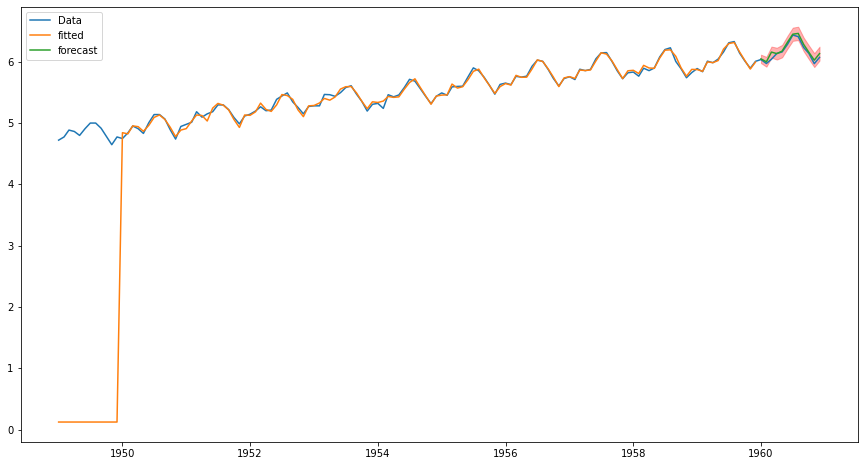

In [54]:
train_pred_log=logmodel.predict_in_sample(start=0, end=-1)
fig,ax= plt.subplots(figsize=(15,8))
ax.plot(df.index,df["LogPassengers"],label='Data')
ax.plot(train.index,train_pred_log,label="fitted")
ax.plot(test.index,test_pred_log,label='forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],color='red',alpha=0.3)
ax.legend()

In [55]:
def rmse(t, y):
    return np.sqrt(np.mean((t - y)**2))

In [56]:
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.53646858429312
Logged RMSE: 23.043794797497814


In [57]:
model=pm.auto_arima(train["LogPassengers"],
                    trace=True,
                    suppress_warnings=True,
                    max_p=12,
                    max_q=2,
                    max_order=14,
                    stepwise=True,
                    seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.135, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-212.867, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.296, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-251.224, Time=0.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.18 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-250.098, Time=0.29 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-226.807, Time=0.26 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-233.612, Time=0.18 sec

Best model:  ARIMA(4,1,2)(0,0,0)[0] intercept
T

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 133.612
Date:                Sun, 24 Oct 2021   AIC                           -251.224
Time:                        20:51:27   BIC                           -228.223
Sample:                             0   HQIC                          -241.878
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0097      0.002      5.257      0.000       0.006       0.013
ar.L1          0.0663      0.127      0.520      0.603      -0.183       0.316
ar.L2          0.4373      0.121      3.607      0.000       0.200       0.675
ar.L3         -0.2335      0.101     -2.319      0.020      -0.431      -0.036
ar.L4         -0.2116      0.104     -2.033      0.042      -0.416      -0.008
ma.L1         -0.0612      0.086     -0.712      0.476      -0.229       0.107
ma.L2         -0.8636      0.084    -10.267      0.000      -1.028      -0.699
sigma2         0.0075      0.001      5.536      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.91
Prob(Q):                              0.89   Prob(JB):                         0.05
Heteroskedasticity (H):               1.04   Skew:                             0.20
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

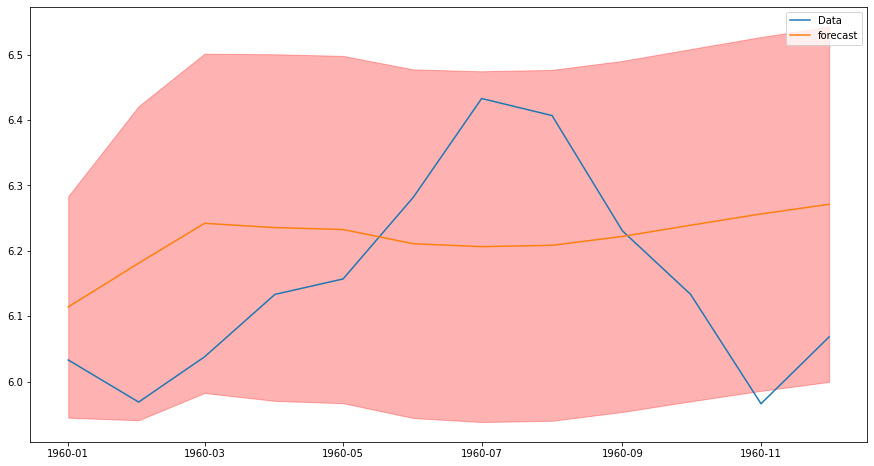

In [60]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax= plt.subplots(figsize=(15,8))
ax.plot(test.index,test["LogPassengers"],label='Data')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],color='red',alpha=0.3)
ax.legend()

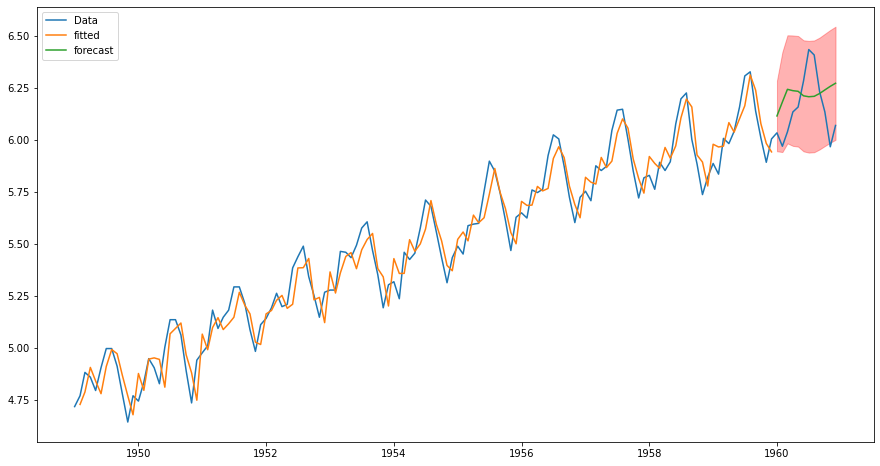

In [64]:
train_pred=model.predict_in_sample(start=1, end=-1)
fig,ax= plt.subplots(figsize=(15,8))
ax.plot(df.index,df["LogPassengers"],label='Data')
ax.plot(train.index[1:],train_pred,label="fitted")
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],color='red',alpha=0.3)
ax.legend()

In [65]:
rmse(test["Passengers"],np.exp(test_pred))

82.23054917185802

In [66]:
model=pm.auto_arima(train["LogPassengers"],
                    trace=True,
                    suppress_warnings=True,
                    max_p=12,
                    max_q=2,
                    max_order=14,
                    stepwise=False,
                    seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.135, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.296, Time=0.41 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.17 sec


/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-251.224, Time=0.26 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-227.112, Time=0.14 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-226.807, Time=0.28 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-250.098, Time=0.49 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-225.728, Time=0.29 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-246.904, Time=0.35 sec
 ARIMA(6,1,2)(0,0,0)[0] intercept   : AIC=-248.159, Time=0.44 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-228.979, Time=0.27 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-270.976, Time=0.63 sec


/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(7,1,2)(0,0,0)[0] intercept   : AIC=-252.202, Time=0.45 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=-271.247, Time=0.57 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=-299.030, Time=0.64 sec


/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(8,1,2)(0,0,0)[0] intercept   : AIC=-295.307, Time=0.48 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=-274.932, Time=0.68 sec
 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=-298.979, Time=0.46 sec
 ARIMA(9,1,2)(0,0,0)[0] intercept   : AIC=-296.122, Time=0.85 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(10,1,1)(0,0,0)[0] intercept   : AIC=-343.967, Time=0.67 sec
 ARIMA(10,1,2)(0,0,0)[0] intercept   : AIC=-366.637, Time=0.96 sec
 ARIMA(11,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(11,1,1)(0,0,0)[0] intercept   : AIC=-375.283, Time=0.70 sec
 ARIMA(11,1,2)(0,0,0)[0] intercept   : AIC=-407.363, Time=0.72 sec
 ARIMA(12,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(12,1,1)(0,0,0)[0] intercept   : AIC=-425.065, Time=0.70 sec
 ARIMA(12,1,2)(0,0,0)[0] intercept   : AIC=-417.517, Time=1.01 sec

Best model:  ARIMA(12,1,1)(0,0,0)[0] intercept
Total fit time: 16.257 seconds


In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 227.532
Date:                Sun, 24 Oct 2021   AIC                           -425.065
Time:                        20:58:56   BIC                           -381.937
Sample:                             0   HQIC                          -407.540
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0088      0.006      1.448      0.148      -0.003       0.021
ar.L1          0.0463      0.095      0.485      0.628      -0.141       0.233
ar.L2         -0.1224      0.070     -1.758      0.079      -0.259       0.014
ar.L3         -0.0538      0.071     -0.758      0.448      -0.193       0.085
ar.L4         -0.1278      0.076     -1.686      0.092      -0.276       0.021
ar.L5          0.0170      0.069      0.245      0.806      -0.119       0.153
ar.L6         -0.0955      0.067     -1.416      0.157      -0.228       0.037
ar.L7         -0.0710      0.076     -0.928      0.354      -0.221       0.079
ar.L8         -0.1478      0.070     -2.101      0.036      -0.286      -0.010
ar.L9          0.0091      0.083      0.110      0.912      -0.153       0.171
ar.L10        -0.1020      0.068     -1.493      0.135      -0.236       0.032
ar.L11        -0.0123      0.075     -0.164      0.870      -0.159       0.135
ar.L12         0.7587      0.067     11.358      0.000       0.628       0.890
ma.L1         -0.3645      0.133     -2.743      0.006      -0.625      -0.104
sigma2         0.0016      0.000      7.058      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.79   Prob(JB):                         0.34
Heteroskedasticity (H):               0.37   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

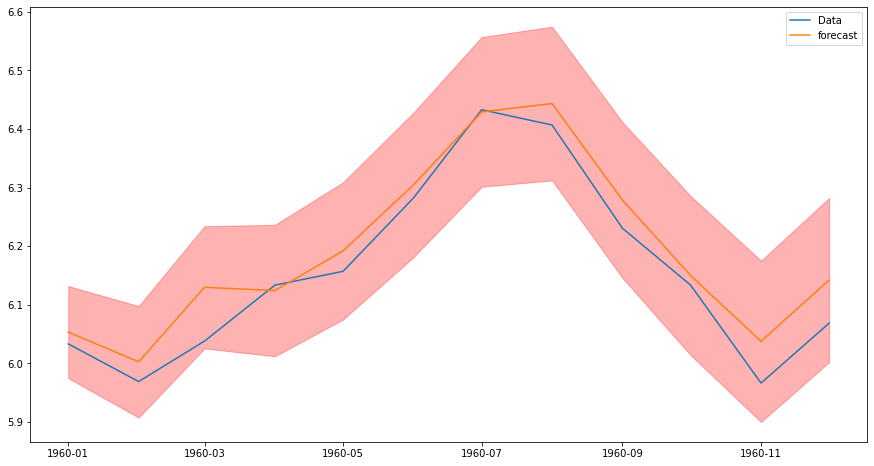

In [68]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax= plt.subplots(figsize=(15,8))
ax.plot(test.index,test["LogPassengers"],label='Data')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],color='red',alpha=0.3)
ax.legend()

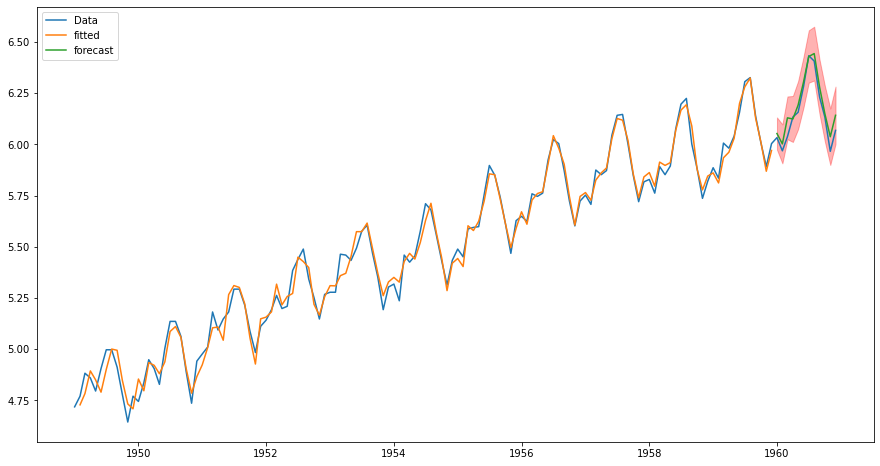

In [69]:
train_pred=model.predict_in_sample(start=1, end=-1)
fig,ax= plt.subplots(figsize=(15,8))
ax.plot(df.index,df["LogPassengers"],label='Data')
ax.plot(train.index[1:],train_pred,label="fitted")
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],color='red',alpha=0.3)
ax.legend()

In [70]:
rmse(test["Passengers"],np.exp(test_pred))

21.295265531502885